This note book contains example code found in the book [Deep Learning Models: A Practical Approach for Hands-On Professionals]. It is intended to aid the quick execution of of the examples while much of the details are remain in the book.

# Chapter 3. Building Deep Learning Models

## 3.1	Introduction

In this we illustrate how to build deep learning models, their training and and evaluation using the Keras framework in a simple and concise way. We briefly explain some of the concepts behind these models so as to give the reader smooth entry into each section while focusing mainly of how-to-use rather than details of algorithms themselves.  

## 3.1.1	Shallow Networks

In recent terminology, neural networks can be categorized into deep and shallow neural networks. In this categorization, shallow neural networks can be thought of as the basic building blocks required to understand deep and consist of a few hidden layers, normally one or two. In this sub-section we will give a brief overview of shallow networks since they are an important part of artificial intelligence.  

### Simple Perceptron Model Example

In [13]:
# Import the necessary libraries

from keras import models
from keras import layers


In [14]:
# Load MNIST dataset from Keras

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [15]:
# Define the network model by adding two Dense layers

shallownetwork = models.Sequential()
shallownetwork.add(layers.Dense(4, activation='relu', input_shape=(28 * 28,)))
shallownetwork.add(layers.Dense(10, activation='softmax'))


In [16]:
# Compile the model
shallownetwork.compile(optimizer = 'adam', loss= 'categorical_crossentropy',  metrics=['accuracy'])

In [17]:
# Preprocess the data by scaling it from [0, 255] range to [0, 1] range.

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [18]:
# Prepare the training and test labels

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [19]:

# Performing training of the network using the MNIST training dataset

history = shallownetwork.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 1.1337 - accuracy: 0.6103 - val_loss: 0.6370 - val_accuracy: 0.8129
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.5941 - accuracy: 0.8238 - val_loss: 0.5395 - val_accuracy: 0.8430
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.5272 - accuracy: 0.8468 - val_loss: 0.4978 - val_accuracy: 0.8557
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4965 - accuracy: 0.8576 - val_loss: 0.4833 - val_accuracy: 0.8616
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4790 - accuracy: 0.8626 - val_loss: 0.4717 - val_accuracy: 0.8657
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.4667 - accuracy: 0.8673 - val_loss: 0.4661 - val_accuracy: 0.8670
Epoch 7/10
60000/60000 [==============================] - 1s 25us/st

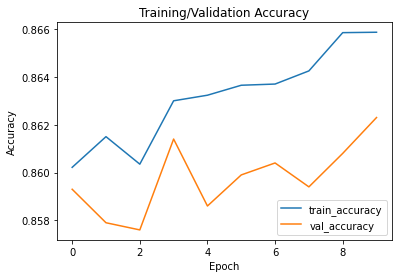

In [46]:
# Plot training results

#Import library for plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Validation Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [47]:
# Evaluate the model using the MNIST test dataset

test_loss, test_acc = shallownetwork.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 14us/step
test_acc: 0.8622999787330627


In [48]:
# Define the network model by adding two Dense layers, with increased network size to 512

shallownetwork = models.Sequential()
shallownetwork.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
shallownetwork.add(layers.Dense(10, activation='softmax'))


In [49]:
# Compile the model
shallownetwork.compile(optimizer = 'adam', loss= 'categorical_crossentropy',  metrics=['accuracy'])

In [51]:
# Performing training of the network using the MNIST training dataset with increased batchsize of 128

history = shallownetwork.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2657 - accuracy: 0.9237 - val_loss: 0.1338 - val_accuracy: 0.9603
Epoch 2/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.1077 - accuracy: 0.9685 - val_loss: 0.0963 - val_accuracy: 0.9702
Epoch 3/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0704 - accuracy: 0.9794 - val_loss: 0.0766 - val_accuracy: 0.9765
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0509 - accuracy: 0.9848 - val_loss: 0.0648 - val_accuracy: 0.9801
Epoch 5/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0370 - accuracy: 0.9892 - val_loss: 0.0704 - val_accuracy: 0.9778
Epoch 6/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0703 - val_accuracy: 0.9778
Epoch 7/10
60000/60000 [==============================] - 4s 61us/st

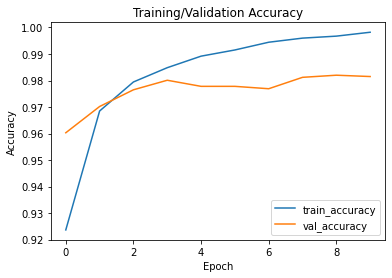

In [52]:
# Plot training results

#Import library for plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Validation Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [53]:
# Evaluate the model using the MNIST test dataset

test_loss, test_acc = shallownetwork.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 41us/step
test_acc: 0.9815000295639038


### Convolutional Neural Network  (CNN)

A convolutional neural network (CNN) is a neural network which  uses at least one layer as part part of the model. The typical construction of a CNN involves the following layers between input and output: at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers: convolutional layers, pooling layers and 
fully connected/dense layers. 


Convolutional layers apply convolutional operations on their inputs to extract features of the input. Pooling operations are used to reduce the size of the convolution layer outputs by either maximization or averaging operations. Normally, the averaging is done over a 2x2 matrix. Fully connected layers usually come at the top of the network (close to output) and are also sometimes referred to as dense layers. 

CNNs have successfully applied to computer vision, producing state-of-the-art performance in most applications.

The figure below illustrates the structure a CNN.
<Figure: CNN>

We continue with the MNIST data as an example.


In [7]:
# Example of CNN using the MNIST data set

# Import necessary packages
from keras import layers
from keras import models


In [26]:
# Define the CNN model with 3 convolution layers and 2 pooling layers
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))


In [21]:
# View the model summary
cnn_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [30]:
# Training the convnet on MNIST images

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = cnn_model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 454us/step - loss: 1.9490 - accuracy: 0.4005 - val_loss: 1.0301 - val_accuracy: 0.7310
Epoch 2/10
60000/60000 [==============================] - 28s 458us/step - loss: 0.6744 - accuracy: 0.8175 - val_loss: 0.4449 - val_accuracy: 0.8768
Epoch 3/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.4207 - accuracy: 0.8759 - val_loss: 0.3295 - val_accuracy: 0.9018
Epoch 4/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.3368 - accuracy: 0.8990 - val_loss: 0.2709 - val_accuracy: 0.9168
Epoch 5/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.2629 - accuracy: 0.9203 - val_loss: 0.2112 - val_accuracy: 0.9352
Epoch 6/10
60000/60000 [==============================] - 30s 493us/step - loss: 0.2200 - accuracy: 0.9325 - val_loss: 0.1844 - val_accuracy: 0.9445
Epoch 7/10
60000/60000 [==============================] 

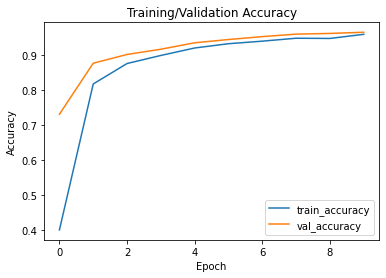

In [31]:
# Plot training results

#Import library for plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Validation Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [33]:
# Evaluate the model using the MNIST test dataset
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 122us/step
test_acc: 0.9653000235557556


### Recurrent Neural Network (RCN)

Another popular type of neural network is the recurrent neural network that has been very successfully used for application like natural language processing and speech recognition. 
RNNs differ from CNNs in that they have memory, meaning that previous inputs have influence on the present input and output. We will not dwell much on RNNs in this text but Fig. 3.1* gives a simplified visual illustration on how they work.

In [83]:
# Import necessary packages

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [84]:
# Load MNIST dataset from Keras

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [85]:
# Extract the number of labels
num_train_labels = len(np.unique(train_labels))

In [86]:
# Normalize data for training

train_images = train_images.reshape((60000, 28, 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28))
test_images = test_images.astype("float32") / 255

In [87]:
# Prepare the training and test labels

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [88]:
# Create RNN model with 256 units
rnn_model = Sequential()
rnn_model.add(SimpleRNN(256,input_shape=(28, 28)))
rnn_model.add(Dense(num_train_labels, activation='softmax'))
rnn_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_24 (SimpleRNN)    (None, 256)               72960     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2570      
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Train the with the RNN  model with batch size of 128 and 20 epochs
rnn_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = rnn_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 252us/sample - loss: 0.1465 - accuracy: 0.9552 - val_loss: 0.1298 - val_accuracy: 0.9581
Epoch 2/20
60000/60000 [==============================] - 13s 225us/sample - loss: 0.1175 - accuracy: 0.9643 - val_loss: 0.0926 - val_accuracy: 0.9712
Epoch 3/20
60000/60000 [==============================] - 14s 226us/sample - loss: 0.1092 - accuracy: 0.9672 - val_loss: 0.1289 - val_accuracy: 0.9632
Epoch 4/20
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0968 - accuracy: 0.9712 - val_loss: 0.0928 - val_accuracy: 0.9717
Epoch 5/20
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0959 - accuracy: 0.9712 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 6/20
60000/60000 [==============================] - 14s 233us/sample - loss: 0.0924 - accuracy: 0.9722 - val_loss: 0.0781 - val_accuracy: 0.9766
Epoch 7/20
60000/60000 [====================

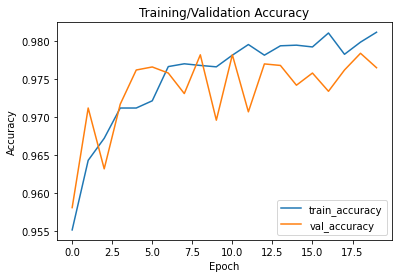

In [93]:
# Plot training results

#Import library for plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Validation Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [95]:
# Evaluate the model using the MNIST test dataset
test_loss, test_acc = rnn_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
#print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

10000/10000 [==============================] - 1s 150us/sample - loss: 0.0828 - accuracy: 0.9765
test_acc: 0.9765


### LSTM/GRU

The LSTM and GRU layers are designed to solve to the vanishing gradient problem that makes SimpleRNN not suitable for most practical problems. This is achieved by injecting information from previous layers at a later time using some form of forgetting factors to circumvent the vanishing-gradient problem considerably. On the other hand, GRUs operate on the same principle as LSTMs except that for LSTM, three gates, namely input, output and forget gate are used, while for GRU only two gates, reset and update gate, are required. The choice between the two is trade-off between accuracy and computational complexity with LSTMs expected give higher accuracy. 

#### LSTM Example

In [18]:
# Example of LSTM using the MNIST data set

# Import necessary packages
from keras import layers
from keras import models


In [19]:
# Import necessary packages
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.utils import to_categorical
from keras.datasets import mnist

In [20]:
# Load MNIST dataset from Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Extract the number of labels
num_train_labels = len(np.unique(train_labels))


In [21]:
# Normalize data for training
train_images = train_images.reshape((60000, 28, 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28))
test_images = test_images.astype("float32") / 255

In [22]:
# Prepare the training and test labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
# Create LSTM model with 256 units
lstm_model = Sequential()
lstm_model.add(layers.LSTM(256,input_shape=(28, 28)))
lstm_model.add(Dense(num_train_labels, activation='softmax'))
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Train the with the LSTM model with batch size of 128 and 20 epochs
lstm_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = lstm_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 72s 1ms/step - loss: 0.4672 - accuracy: 0.8441 - val_loss: 0.1513 - val_accuracy: 0.9516
Epoch 2/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1244 - accuracy: 0.9614 - val_loss: 0.1055 - val_accuracy: 0.9676
Epoch 3/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0836 - accuracy: 0.9740 - val_loss: 0.0771 - val_accuracy: 0.9740
Epoch 4/20
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0748 - val_accuracy: 0.9766
Epoch 5/20
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0512 - accuracy: 0.9842 - val_loss: 0.0502 - val_accuracy: 0.9838
Epoch 6/20
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0548 - val_accuracy: 0.9828
Epoch 7/20
60000/60000 [==============================] - 70s 1ms/st

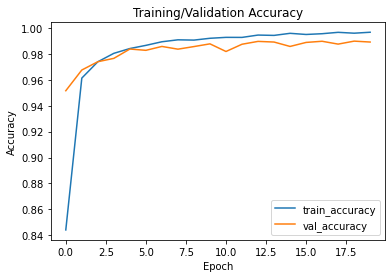

In [27]:
# Plot training results

#Import library for plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Validation Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [29]:
# Evaluate the model using the MNIST test dataset
test_loss, test_acc = lstm_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
#print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

10000/10000 [==============================] - 6s 644us/step
test_acc: 0.9891999959945679


#### GRU Example

In [30]:
# Example of GRU using the MNIST data set

# Import necessary packages
from keras import layers
from keras import models


In [31]:
# Import necessary packages
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.utils import to_categorical
from keras.datasets import mnist

In [32]:
# Load MNIST dataset from Keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Extract the number of labels
num_train_labels = len(np.unique(train_labels))


In [33]:
# Normalize data for training
train_images = train_images.reshape((60000, 28, 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28))
test_images = test_images.astype("float32") / 255

In [34]:
# Prepare the training and test labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [36]:
# Create GRU model with 256 units
gru_model = Sequential()
gru_model.add(layers.GRU(256,input_shape=(28, 28)))
gru_model.add(Dense(num_train_labels, activation='softmax'))
gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 256)               218880    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 221,450
Trainable params: 221,450
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Train the with the GRU model with batch size of 128 and 20 epochs
gru_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = gru_model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 57s 942us/step - loss: 0.4724 - accuracy: 0.8431 - val_loss: 0.1746 - val_accuracy: 0.9480
Epoch 2/20
60000/60000 [==============================] - 56s 926us/step - loss: 0.1271 - accuracy: 0.9615 - val_loss: 0.1011 - val_accuracy: 0.9692
Epoch 3/20
60000/60000 [==============================] - 56s 928us/step - loss: 0.0803 - accuracy: 0.9757 - val_loss: 0.0631 - val_accuracy: 0.9796
Epoch 4/20
60000/60000 [==============================] - 55s 909us/step - loss: 0.0602 - accuracy: 0.9814 - val_loss: 0.0616 - val_accuracy: 0.9801
Epoch 5/20
60000/60000 [==============================] - 54s 903us/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0522 - val_accuracy: 0.9846
Epoch 6/20
60000/60000 [==============================] - 54s 907us/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0388 - val_accuracy: 0.9879
Epoch 7/20
60000/60000 [==============================] 

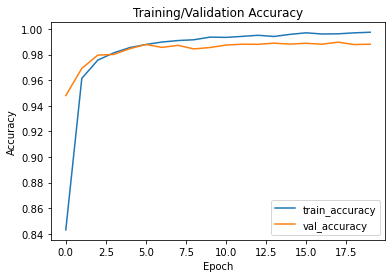

In [38]:
# Plot training results

#Import library for plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Validation Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [39]:
# Evaluate the model using the MNIST test dataset
test_loss, test_acc = gru_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
#print("\nTest accuracy: %.1f%%" % (100.0 * test_acc))

10000/10000 [==============================] - 5s 469us/step
test_acc: 0.988099992275238
